In [3]:
%matplotlib inline
import pandas as pd

#вргузим ириски

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

X = pd.DataFrame(iris.data,columns=["sep_l","sep_w","pet_l","pet_w"])
y = iris.target ==2


In [5]:
from sklearn.cross_validation import train_test_split
train_data,test_data, train_labels, test_labels  = train_test_split(X,y,
                                                                    test_size=0.7,
                                                                   random_state=100)

#Factory
сравниваем модели разных фреймворков и не только

In [6]:
from rep.metaml import ClassifiersFactory
from rep.estimators import NeurolabClassifier, XGBoostClassifier
from rep.estimators import SklearnClassifier as sk
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [7]:
factory = ClassifiersFactory()
factory['rf'] = sk(RandomForestClassifier(n_estimators=200))
factory['extra'] = sk(ExtraTreesClassifier(n_estimators=200))
factory['xgb'] = XGBoostClassifier(n_estimators=150)
factory['xgb-subsample'] = XGBoostClassifier(n_estimators=150,
                                             features = ["sep_l","sep_w","pet_w",])

In [8]:
_=factory.fit(train_data, train_labels)

model rf           was trained in 0.13 seconds
model extra        was trained in 0.11 seconds
model xgb          was trained in 0.67 seconds
model xgb-subsample was trained in 0.57 seconds
Totally spent 1.48 seconds on training


#Анализ, карл!

In [9]:
report = factory.test_on(test_data, test_labels)

In [10]:
from rep.report.metrics import LogLoss, RocAuc
report.compute_metric(LogLoss())

OrderedDict([('rf', 0.098818222518117671), ('extra', 0.097281199115379344), ('xgb', 0.24837773192141743), ('xgb-subsample', 0.2309134502141249)])

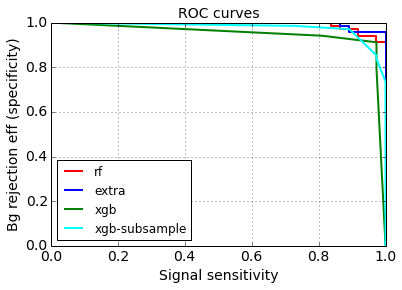

In [11]:
report.roc()

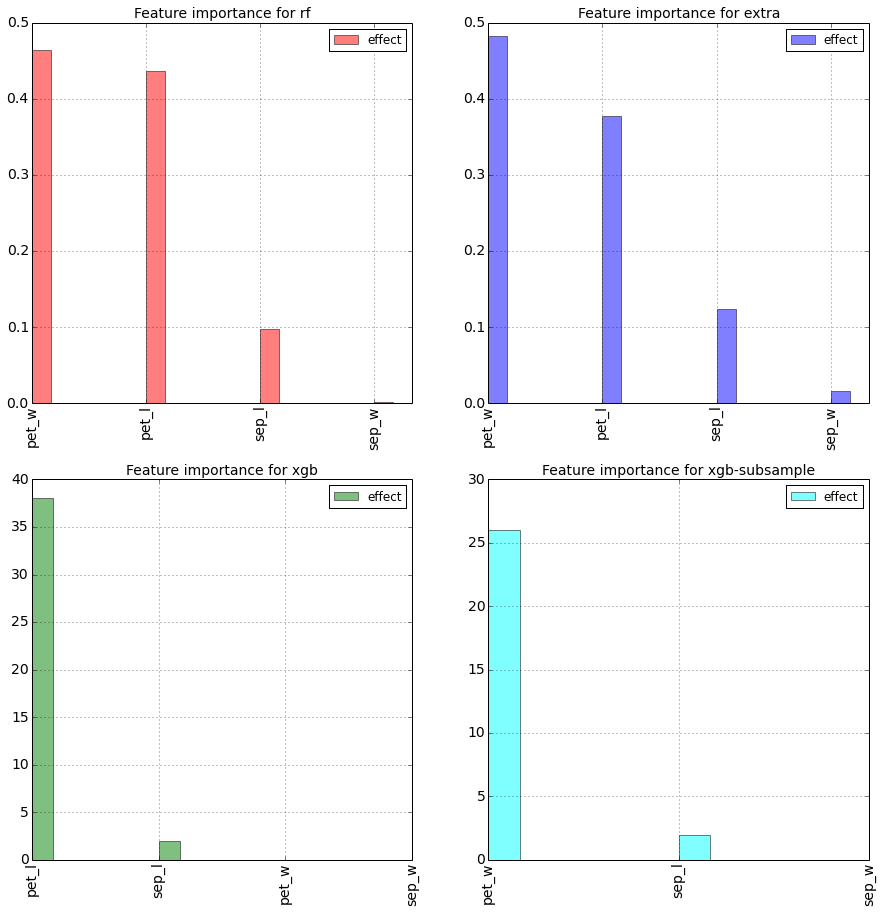

In [12]:
report = factory.test_on(test_data, test_labels)
features_importances = report.feature_importance()
features_importances.plot(figsize=[15,15])

#kitchen sink ML

In [13]:
from sklearn.datasets import load_digits, load_iris
import pandas as pd
mnist = load_digits(n_class = 10)

X = pd.DataFrame(mnist.data)
y = mnist.target%2

train_data,test_data, train_labels, test_labels  = train_test_split(X,y,
                                                                    test_size=0.95,
                                                                   random_state=100)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from rep.estimators import NeurolabClassifier

In [15]:
factory = ClassifiersFactory()

In [16]:
xgb = XGBoostClassifier(n_estimators=20)
factory['bagged xgb epic'] = sk(BaggingClassifier(xgb,n_estimators=10))

In [17]:
factory['PCAd-xgb'] = sk(Pipeline(steps=[('pca',PCA(n_components=20)),
                                  ('xgb',XGBoostClassifier(n_estimators=20))]))

In [18]:
_=factory.fit(train_data, train_labels)

model bagged xgb epic was trained in 1.26 seconds
model PCAd-xgb     was trained in 0.13 seconds
Totally spent 1.40 seconds on training


#кто лучше?

In [19]:
report = factory.test_on(test_data,test_labels)

In [20]:
report.compute_metric(LogLoss())

OrderedDict([('bagged xgb epic', 0.27893168907340748), ('PCAd-xgb', 0.24820336079540112)])

In [21]:
report.compute_metric(RocAuc())

OrderedDict([('bagged xgb epic', 0.96246984490095955), ('PCAd-xgb', 0.96653624029173812)])

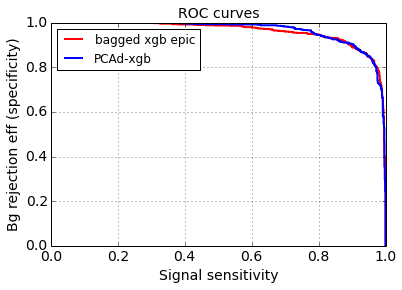

In [22]:
report.roc()